In [1]:
! pip install --user numpy pandas plotly scipy matplotlib

In [2]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
df = pd.read_csv("data/CARS.csv")

In [4]:
df["MSRP"] = df["MSRP"].replace('[\$,]', '', regex=True).astype(float)

In [5]:
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


# Punto 2.1.1

<Axes: xlabel='Make', ylabel='Count'>

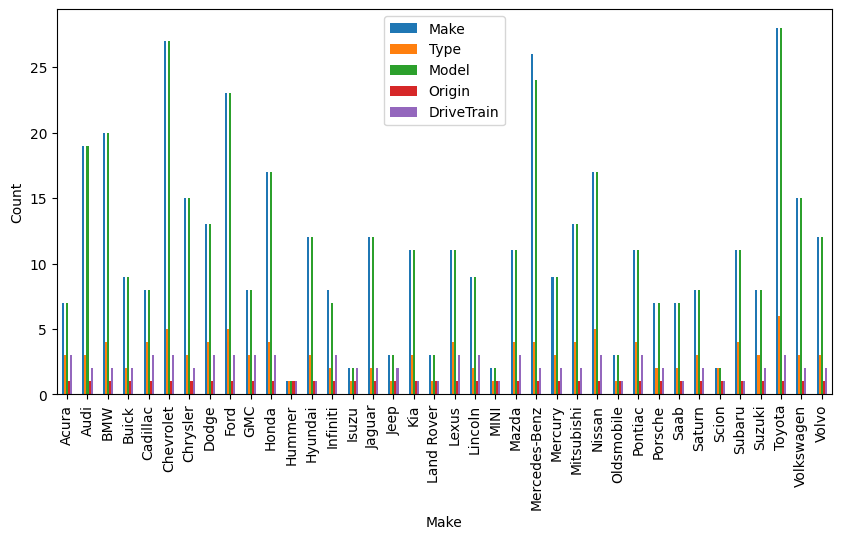

In [7]:
df[["Make","Model", "Type","Origin","DriveTrain", ]].groupby(["Make"]).agg({"Make":"count", "Type": pd.Series.nunique,\
                                           "Model": pd.Series.nunique,"Type": pd.Series.nunique,\
                                           "Origin": pd.Series.nunique,"DriveTrain": pd.Series.nunique})\
.plot.bar(xlabel="Make", ylabel="Count", figsize=(10,5))

# Punto 2.1.2

<Axes: >

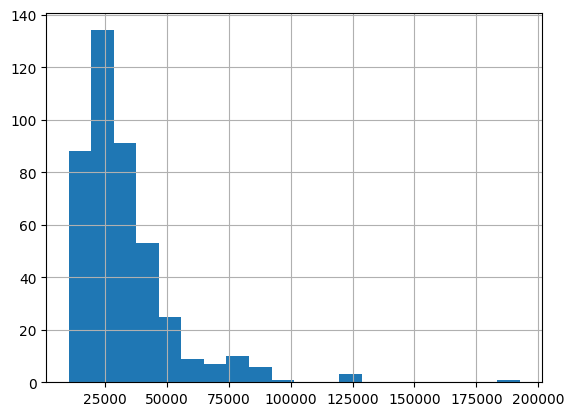

In [8]:
df["MSRP"].hist(bins=20)

<Axes: >

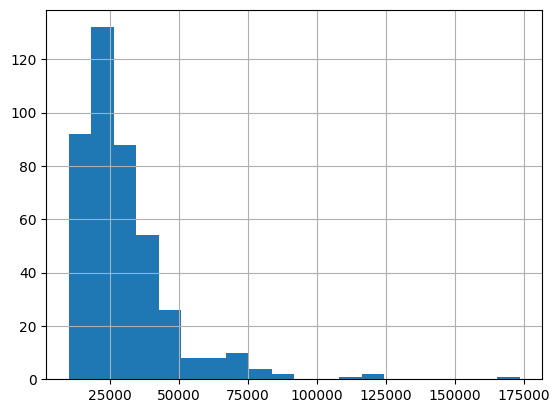

In [9]:
df["Invoice"].hist(bins=20)

<Axes: >

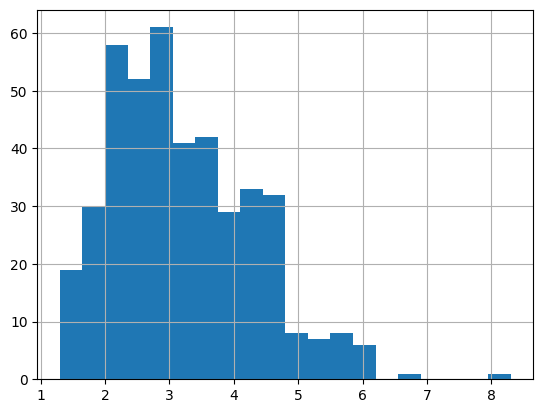

In [10]:
df["EngineSize"].hist(bins=20)

<Axes: >

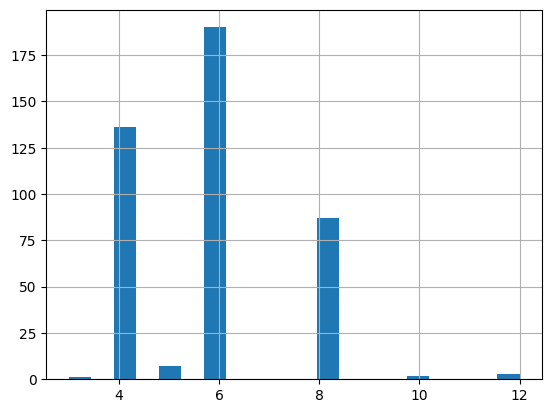

In [11]:
df["Cylinders"].hist(bins=20)

<Axes: >

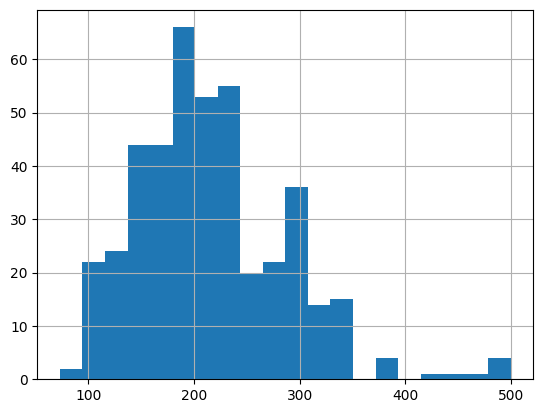

In [12]:
df["Horsepower"].hist(bins=20)

<Axes: >

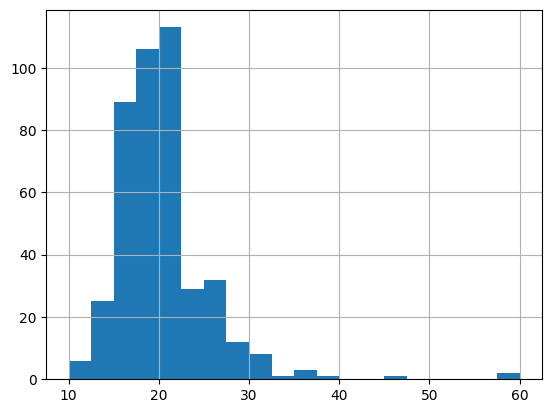

In [13]:
df["MPG_City"].hist(bins=20)

<Axes: >

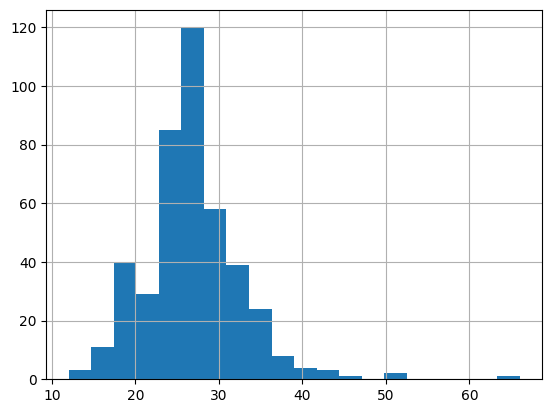

In [14]:
df["MPG_Highway"].hist(bins=20)

<Axes: >

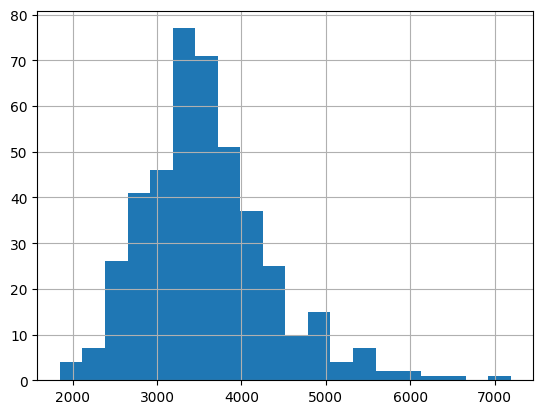

In [15]:
df["Weight"].hist(bins=20)

<Axes: >

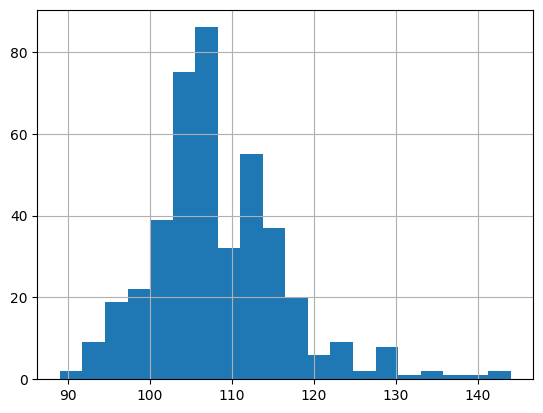

In [16]:
df["Wheelbase"].hist(bins=20)

<Axes: >

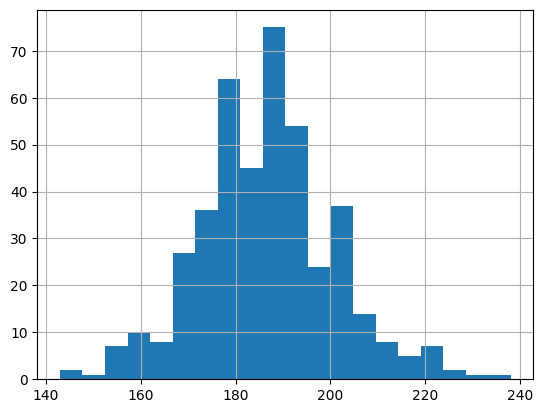

In [17]:
df["Length"].hist(bins=20)

## Lista de carros con invoice más lejano a 4 desviaciones estandar
En el query solo se evalúa si la variable(x) cumple con: x < media - 4 * std ó x > media+4*std 

In [18]:
df.query('MSRP > (32774.855140+(4*19431.716674)) or MSRP < (32774.855140-(4*19431.716674))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
262,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493,13,19,4473,114,196
270,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388.0,5.5,8.0,493,14,21,4235,101,179
271,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854.0,5.5,12.0,493,13,19,4429,101,179
334,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477,17,24,3131,93,175


In [19]:
df.query('Invoice > (30014.700935+(4*17642.117750)) or Invoice < (30014.700935-(4*17642.117750))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
262,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493,13,19,4473,114,196
270,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388.0,5.5,8.0,493,14,21,4235,101,179
271,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854.0,5.5,12.0,493,13,19,4429,101,179
334,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477,17,24,3131,93,175


In [20]:
df.query('EngineSize > (3.196729+(4*1.108595)) or EngineSize < (3.196729-(4*1.108595))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
114,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,81795.0,74451.0,8.3,10.0,500,12,20,3410,99,176


In [21]:
df.query('Cylinders > (5.807512+(4*1.558443)) or Cylinders < (5.807512-(4*1.558443))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [22]:
df.query('Horsepower > (215.885514+(4*71.836032)) or Horsepower < (215.885514-(4*71.836032))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [23]:
df.query('MPG_City > (20.060748+(4*5.238218)) or MPG_City < (20.060748-(4*5.238218))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
149,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,20140.0,18451.0,1.4,4.0,93,46,51,2732,103,175
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110.0,17911.0,2.0,3.0,73,60,66,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110,59,51,2890,106,175


In [24]:
df.query('MPG_Highway > (26.843458+(4*5.741201)) or MPG_Highway < (26.843458-(4*5.741201))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
149,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,20140.0,18451.0,1.4,4.0,93,46,51,2732,103,175
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110.0,17911.0,2.0,3.0,73,60,66,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110,59,51,2890,106,175


In [25]:
df.query('Weight > (3577.953271+(4*758.983215)) or Weight < (3577.953271-(4*758.983215))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
118,Ford,Excursion 6.8 XLT,SUV,USA,All,41475.0,36494.0,6.8,10.0,310,10,13,7190,137,227


In [26]:
df.query('Wheelbase > (108.154206+(4*8.311813)) or Wheelbase < (108.154206-(4*8.311813))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
87,Chevrolet,Silverado SS,Truck,USA,All,40340.0,35399.0,6.0,8.0,300,13,17,4804,144,238
146,GMC,Sierra Extended Cab 1500,Truck,USA,Rear,25717.0,22604.0,4.8,8.0,285,17,20,4548,144,230


In [27]:
df.query('Length > (186.362150+(4*14.357991)) or Length < (186.362150-(4*14.357991))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


# Test de normalidad

In [28]:
def normal_test(variable):
    k2, p = stats.normaltest(df[[variable]])
    alpha = 1e-3
    if p < alpha:
        print("It is not normal")
    else:
        print("It is normal")

## Para MSR:

In [29]:
normal_test("MSRP")

It is not normal


## Para Invoice:

In [30]:
normal_test("Invoice")

It is not normal


## Para EngineSize:

In [31]:
normal_test("EngineSize	")

KeyError: "None of [Index(['EngineSize\\t'], dtype='object')] are in the [columns]"

## Para Cylinders:

In [33]:
normal_test("Cylinders")

It is normal


## Para Horsepower	

In [34]:
normal_test("Horsepower")

It is not normal


## Para MPG_City:


In [35]:
normal_test("MPG_City")

It is not normal


## Para MPG_Highway:

In [36]:
normal_test("MPG_Highway")

It is not normal


## Para Weight:

In [37]:
normal_test("Weight")

It is not normal


## Para Wheelbase:

In [38]:
normal_test("Wheelbase")

It is not normal


## Para Length:

In [39]:
normal_test("Length")

It is normal


# Punto 2.2.1

In [54]:
px.box(df, x="Type", y="MPG_City")

En el gráfico se observa la cantidad de millas por galón que recorre un automóvil en la ciudad por fabricante

In [55]:
px.box(df, x="Model", y="MPG_City")

Cada caja nos da información sobre cuántas millas por galón recorre los automóviles de cada modelo. La mayoría aparece solo una línea, esto debido a que solo existe un automóvil con ese modelo

In [49]:
px.box(df, x="Type", y="MPG_City")

Cada caja representa la cantidad de millas por galón que recorre cada tipo de automóvil

In [50]:
px.box(df, x="Origin", y="MPG_City")

En el gráfico se muestra la información de cuántas millas por galón recorren los autos según el origen

In [53]:
px.box(df, x="DriveTrain", y="MPG_City")

En el gráfico se muestra la cantidad de millas por galón que recorre un automóvil según su transmisión

In [64]:
px.scatter(df,x="MPG_City", y="MSRP")

En este gráfico los puntos se mustran donde se interceptan las variables "MSRP" y "MPG_City", por ejemplo en los datos que tenemos hay dos carros que recorren diez millas por galón en ciudad, uno con precio sugerido por el fabricante de 50.000 y otro de 41.475 (Para todos los scatter plot el análisis es similar)

In [65]:
px.scatter(df,x="MPG_City", y="Invoice")

In [66]:
px.scatter(df,x="MPG_City", y="EngineSize")

In [67]:
px.scatter(df,x="MPG_City", y="Cylinders")

In [68]:
px.scatter(df,x="MPG_City", y="Horsepower")

In [70]:
px.scatter(df,x="MPG_City", y="MPG_Highway")

In [71]:
px.scatter(df,x="MPG_City", y="Weight")

In [72]:
px.scatter(df,x="MPG_City", y="Wheelbase")

In [73]:
px.scatter(df,x="MPG_City", y="Length")

# Punto 2.3.1

In [84]:
px.imshow(df[["MSRP","Invoice","EngineSize","Cylinders","Horsepower","MPG_City",\
                "MPG_Highway","Weight", "Wheelbase","Length"]].corr())

Para explicar la variabilidad de MPG_city las variables más importantes son MPG_highway ya que según el gráfico es la que más correlación tiene, es decir, varían linealmente de forma similar, los coeficientes son positivos o negativos según la relación de covarianza que tengan, si el coeficiente es positivo, las variables tienden a incrementarse juntas, si es negativo, una crece mientras que otra decrece

In [87]:
px.imshow(df.query('Model in["MDX","TSX 4dr"]').corr())

C:\Users\Carlos Manuel Puerta\AppData\Local\Temp\ipykernel_6512\1152658421.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Sí cambia la correlación, los datos outliers nos pueden afectar el análisis ya que el coeficiente de correlación analiza las variables linealmente, por lo tanto al encontrase valores outliers, puede tomar variables que sin tomar en cuenta los outliers tienen correlación positiva como ,negativa o menores